Data tranining x:  (778, 14)
Data tranining y:  (778,)
Data test x:  (195, 14)
Data test y:  (195,)
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.79      0.83        78
           2       0.80      0.87      0.83        75
           3       1.00      1.00      1.00        42

    accuracy                           0.87       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.87      0.87      0.87       195


Accuracy Score:
0.8666666666666667

Accuracy Score:
86.67%


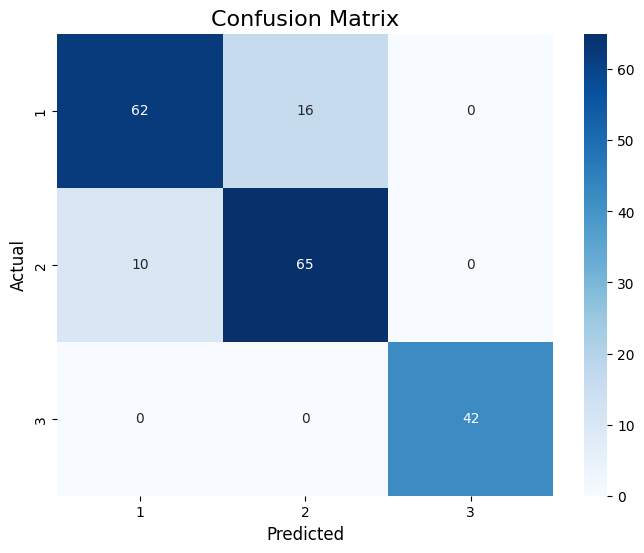

Encoded value 1 corresponds to Beginner
Encoded value 2 corresponds to Intermediate
Encoded value 3 corresponds to Advanced


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('gym_analysis.csv')
# Préparer X (features) et y (target)
X = df.drop(columns=['Experience_Level'])
y = df['Experience_Level']  # Les valeurs de 'Experience_Level' sont déjà numériques

# Encoder les colonnes catégoriques dans X (pas y)
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data tranining x: ', X_train.shape)
print('Data tranining y: ', y_train.shape)
print('Data test x: ', X_test.shape)
print('Data test y: ', y_test.shape)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Créer et entraîner le modèle SVM
svm_model = SVC(kernel='sigmoid', random_state=42)
svm_model.fit(X_train, y_train)
# Prédire sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Évaluer le modèle
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

accuracy_percentage = accuracy_score(y_test, y_pred) * 100

# Affichage de la précision avec un symbole de pourcentage
print("\nAccuracy Score:")
print(f"{accuracy_percentage:.2f}%")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Mappage explicite des niveaux d'expérience
experience_level_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}

# Afficher les classes d'origine pour chaque valeur encodée
for encoded_value in set(y):  # set(y) donne les valeurs uniques dans y
    # Utiliser le mappage pour obtenir le niveau d'expérience correspondant
    experience_level = experience_level_map.get(encoded_value, "Unknown")
    print(f"Encoded value {encoded_value} corresponds to {experience_level}")



In [3]:
testing2 = {
    'Age' : [45],  # Slightly older, could indicate less experience
    'Gender' : [1],  # Assuming 1 = Male, could be any gender
    'Weight_kg' : [92],  # A little heavier, possibly a beginner
    'Height_m' : [1.75],  # Average height
    'Max_BPM' : [150],  # Lower maximum heart rate, common for beginners
    'Avg_BPM' : [135],  # Higher average heart rate during workouts
    'Resting_BPM' : [75],  # Higher resting BPM, typical for beginners
    'Session_Duration_hours' : [0.5],  # Shorter workout duration
    'Calories_Burned' : [350],  # Lower calories burned per session
    'Workout_Type' : [2],  # Assuming 2 = Moderate workout, typical for beginners
    'Fat_Percentage' : [25.0],  # Higher body fat percentage, common for beginners
    'Water_Intake_liters' : [2.0],  # Average water intake
    'Workout_Frequency_days/week' : [2],  # Fewer days per week, typical for beginners
    'BMI' : [30.0]  # BMI in the higher range, common for beginners
}

testing2 = pd.DataFrame(testing2)
# Display the single row as a table
print("Testing data for advanced level fitness:")
print(testing2.to_string(index=False))

# Mappage explicite des niveaux d'expérience
experience_level_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}

# Prédiction du modèle
pred_coba1 = svm_model.predict(testing2)

# Utiliser le mappage pour obtenir le niveau d'expérience correspondant
experience_level = experience_level_map.get(pred_coba1[0])

# Afficher le niveau d'expérience de la personne
print('Level Experience presented in this person:')
print(experience_level)

Testing data for advanced level fitness:
 Age  Gender  Weight_kg  Height_m  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration_hours  Calories_Burned  Workout_Type  Fat_Percentage  Water_Intake_liters  Workout_Frequency_days/week  BMI
  45       1         92      1.75      150      135           75                     0.5              350             2            25.0                  2.0                            2 30.0
Level Experience presented in this person:
Beginner


c:\Users\Nada\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [2]:
#test du modele

testing = {
    'Age' : [56],
    'Gender' : [1],
    'Weight_kg' : [88.3],
    'Height_m' : [1.71],
    'Max_BPM' : [180],
    'Avg_BPM' : [157],
    'Resting_BPM' : [60],
    'Session_Duration_hours' : [1.69],
    'Calories_Burned' : [1313.0],
    'Workout_Type' : [3],
    'Fat_Percentage' : [12.6],
    'Water_Intake_liters' : [3.5],
    'Workout_Frequency_days/week' : [4],
    'BMI' : [30.20]
}

testing = pd.DataFrame(testing)
testing
# Mappage explicite des niveaux d'expérience
experience_level_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}

# Prédiction du modèle
pred_coba = svm_model.predict(testing)

# Utiliser le mappage pour obtenir le niveau d'expérience correspondant
experience_level = experience_level_map.get(pred_coba[0])

# Afficher le niveau d'expérience de la personne
print('Level Experience presented in this person:')
print(experience_level)

Level Experience presented in this person:
Intermediate


c:\Users\Nada\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [4]:
import pandas as pd

# Données d'exemple
advanced_testing = {
    'Age': [56],
    'Gender': [1],  # 1 = Homme, 2 = Femme
    'Weight_kg': [88.3],
    'Height_m': [1.71],
    'Max_BPM': [180],
    'Avg_BPM': [157],
    'Resting_BPM': [60],
    'Session_Duration_hours': [1.69],
    'Calories_Burned': [1313.0],
    'Workout_Type': [3],  # 3 = Entraînement avancé
    'Fat_Percentage': [12.6],
    'Water_Intake_liters': [3.5],
    'Workout_Frequency_days/week': [4],
    'BMI': [30.20]
}

# Conversion en DataFrame
advanced_testing_df = pd.DataFrame(advanced_testing)

# Mappage explicite des niveaux d'expérience
experience_level_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}

# Simulation de prédiction (modèle déjà entraîné)
# Remplacez cette ligne par le modèle entraîné réel
predicted_level_code = [3]  # Supposons que le modèle prédit le niveau avancé

# Mapping de l'expérience
experience_level = experience_level_map.get(predicted_level_code[0])

# Résultat final
print("Level Experience presented in this person:")
print(experience_level)

Level Experience presented in this person:
Advanced
